# Libraries and Data

In [ ]:
! pip install opendatasets

In [ ]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
import opendatasets as od
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Download the dataset
od.download("https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: omniasaaid
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data


100%|██████████| 22.0k/22.0k [00:00<00:00, 27.8MB/s]

In [ ]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv("/content/daily-climate-time-series-data/DailyDelhiClimateTrain.csv")

df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


# Time Series Index

In [ ]:
# Convert 'Order Date' To a Datetime and set as index
df['Date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df.set_index('Date', inplace = True)
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
Date,,,,,
2013-01-01,2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
# Select the Orders Data for 2013-01-01
df.loc['2013-01-01']

,2013-01-01
date,2013-01-01
meantemp,10.0
humidity,84.5
wind_speed,0.0
meanpressure,1015.666667


In [ ]:
# Another way to load the data and set the column 'Date' as index
df1 = pd.read_csv("/content/daily-climate-time-series-data/DailyDelhiClimateTrain.csv",index_col = "date", parse_dates = True)
df1.index


DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26',
               '2016-12-27', '2016-12-28', '2016-12-29', '2016-12-30',
               '2016-12-31', '2017-01-01'],
              dtype='datetime64[ns]', name='date', length=1462, freq=None)

In [ ]:
df1.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
# Resampling to Weekly Frequency and calculate the mean values
df.resample('W').mean(numeric_only=True)

,meantemp,humidity,wind_speed,meanpressure
Date,,,,
2013-01-06,7.705556,84.077778,2.337778,1017.300000
2013-01-13,12.343537,65.145238,8.825170,1016.632653
2013-01-20,13.642857,81.663265,4.242857,1017.139456
2013-01-27,12.329592,67.748299,4.770544,1020.337075
2013-02-03,15.736905,67.667347,2.337194,1017.020578
2013-02-10,15.856973,71.515476,8.885986,1017.048299
2013-02-17,16.012755,74.693878,5.975680,1013.785714
2013-02-24,17.708163,74.534184,8.285000,1016.600000
2013-03-03,18.661054,59.871259,12.895306,1016.395918


Resample offset aliases:
- B = business day
- D = calendar day
- W = weekly
- M = month end
- BM = business month end
- MS = month start
- BMS = business month start
- Q = quarter end
- BQ = business quarter end
- QS = quarter start
- BQS = business quarter start
- A = year end
- BA = business year end
- AS = year start
- BAS = business year start
- h = hourly
- min = minutely
- s = secondly
- ms = milliseconds
- us = microseconds

# Exploring Data

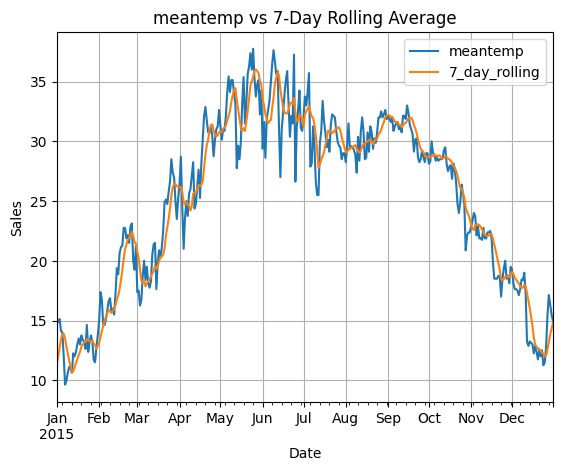

In [ ]:
# Series.rolling() - create a rolling window calculation, to smooth time-series data and identify trends over time

# Create a new column for 7- Day rolling average of the meantemp
df['7_day_rolling']= df['meantemp'].rolling(window = 7).mean()
# Plot both the rolling average and closing values
df[['meantemp', '7_day_rolling']].loc['2015'].plot(title='meantemp vs 7-Day Rolling Average')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.grid(True)


In [ ]:
# Series.idxmax() - To identify the index of the maximum value in a Series.
# Find out the month with highest closing average
df.resample('ME').mean(numeric_only=True)['meantemp'].idxmax()

Timestamp('2016-06-30 00:00:00')

In [ ]:
df

,date,meantemp,humidity,wind_speed,meanpressure,7_day_rolling
Date,,,,,,
2013-01-01,2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN
2013-01-02,2013-01-02,7.400000,92.000000,2.980000,1017.800000,NaN
2013-01-03,2013-01-03,7.166667,87.000000,4.633333,1018.666667,NaN
2013-01-04,2013-01-04,8.666667,71.333333,1.233333,1017.166667,NaN
2013-01-05,2013-01-05,6.000000,86.833333,3.700000,1016.500000,NaN
2013-01-06,2013-01-06,7.000000,82.800000,1.480000,1018.000000,NaN
2013-01-07,2013-01-07,7.000000,78.600000,6.300000,1020.000000,7.604762
2013-01-08,2013-01-08,8.857143,63.714286,7.142857,1018.714286,7.441497
2013-01-09,2013-01-09,14.000000,51.250000,12.500000,1017.000000,8.384354


In [ ]:
df.resample('M').mean(numeric_only=True)

<ipython-input-114-e6056cc5f002>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M').mean(numeric_only=True)


,meantemp,humidity,wind_speed,meanpressure,7_day_rolling
Date,,,,,
2013-01-31,12.074770,73.028802,4.833913,1017.847734,12.225177
2013-02-28,16.867560,71.938563,7.474090,1015.946003,16.440950
2013-03-31,22.814209,57.417243,8.757270,1011.733909,22.439275
2013-04-30,28.895119,34.612103,8.046385,1006.292341,28.042925
2013-05-31,33.776767,28.938249,8.943452,999.924194,33.496829
2013-06-30,32.480873,58.758135,9.593929,997.408849,32.668469
2013-07-31,30.663594,74.873387,7.358698,997.380300,30.842385
2013-08-31,29.547773,76.757104,7.384347,1000.439977,29.566645
2013-09-30,29.840595,64.552738,7.593425,1003.949167,30.024972


In [ ]:
# # Series.pct_change() - calculate the percentage change from the previous row
# # Create a new column for closing daily return (percentage change in the price from one day to the next)
# df['daily_returns'] = df['Close'].pct_change() * 100

In [ ]:
# # Days with more than 10% change in closing price
# df[abs(df['daily_returns']) > 10].head()

# Data Visualization

In [ ]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,7_day_rolling
Date,,,,,,
2013-01-01,2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN
2013-01-02,2013-01-02,7.400000,92.000000,2.980000,1017.800000,NaN
2013-01-03,2013-01-03,7.166667,87.000000,4.633333,1018.666667,NaN
2013-01-04,2013-01-04,8.666667,71.333333,1.233333,1017.166667,NaN
2013-01-05,2013-01-05,6.000000,86.833333,3.700000,1016.500000,NaN


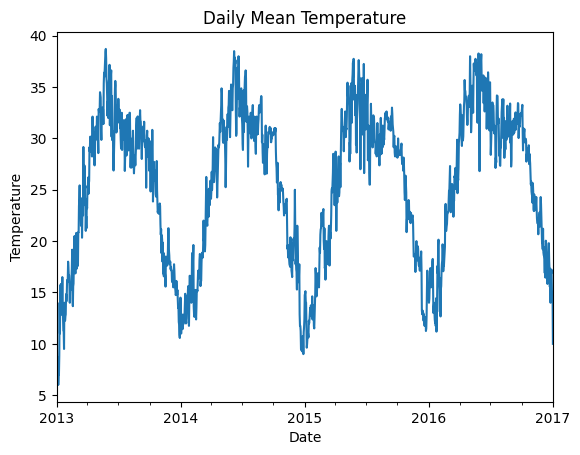

In [ ]:
# Daily Mean Temperature Plot
df['meantemp'].plot(title = 'Daily Mean Temperature')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.show()

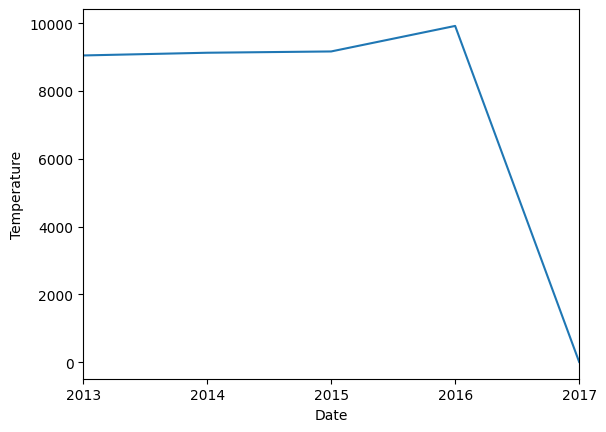

In [ ]:
# Plot the Yearly temp
df.resample('YE').sum(numeric_only=True)['meantemp'].plot()
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.show()

In [ ]:
df.resample('Y').sum(numeric_only=True)

<ipython-input-122-78c5e20c3643>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df.resample('Y').sum(numeric_only=True)


,meantemp,humidity,wind_speed,meanpressure,7_day_rolling
Date,,,,,
2013-12-31,9048.895238,23011.896429,2491.947500,367789.392857,8987.419898
2014-12-31,9128.895542,21815.298757,2465.993978,368046.715540,9132.364929
2015-12-31,9166.825893,22422.128869,2365.420089,368224.709821,9153.611607
2016-12-31,9919.834526,21498.903655,2621.467622,373158.030364,9920.353899
2017-12-31,10.000000,100.000000,0.000000,1016.000000,15.085173


**Based on the data provided, a line plot of temperature over these years would show:**

* Relatively stable temperatures from 2013-2016 with minor fluctuations

* A dramatic drop in temperature values in 2017 across all metrics

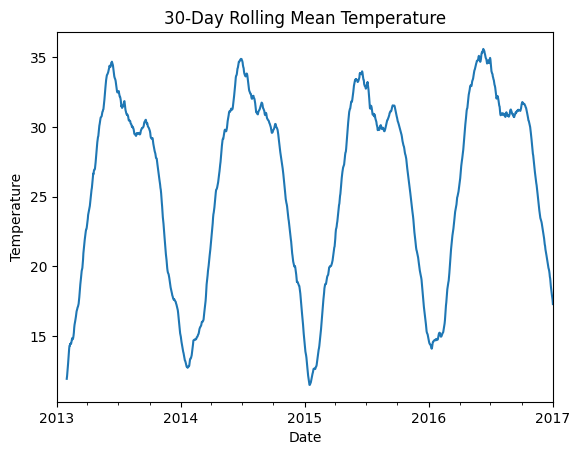

In [ ]:
# # Create a new column for 30- Day rolling average of the Temperature
df['30_day_rolling_temp'] = df['meantemp'].rolling(window = 30).mean()

# Plotting temp Price and 30-day rolling Temperature
df['30_day_rolling_temp'].plot(title = '30-Day Rolling Mean Temperature')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.show()

In [ ]:
# # There's a high correlation between the 30-day rolling Volume and the Closing Price
# df[['Close', '30_day_rolling_vol']].corr()

# Data Manipulation

In [ ]:
# Identify missing values
df.isnull().sum()

,0
date,0
meantemp,0
humidity,0
wind_speed,0
meanpressure,0
7_day_rolling,6
30_day_rolling_temp,29


In [ ]:
# Extract Time Variables
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['weekday'] = df.index.day_name()
df['weekday_numeric'] = df.index.weekday

# 5 & 6 is for Saturday and Sunday
df['is_weekend'] = df.index.weekday > 4

df.head()

,date,meantemp,humidity,wind_speed,meanpressure,7_day_rolling,30_day_rolling_temp,year,month,day,weekday,weekday_numeric,is_weekend
Date,,,,,,,,,,,,,
2013-01-01,2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN,NaN,2013,1,1,Tuesday,1,False
2013-01-02,2013-01-02,7.400000,92.000000,2.980000,1017.800000,NaN,NaN,2013,1,2,Wednesday,2,False
2013-01-03,2013-01-03,7.166667,87.000000,4.633333,1018.666667,NaN,NaN,2013,1,3,Thursday,3,False
2013-01-04,2013-01-04,8.666667,71.333333,1.233333,1017.166667,NaN,NaN,2013,1,4,Friday,4,False
2013-01-05,2013-01-05,6.000000,86.833333,3.700000,1016.500000,NaN,NaN,2013,1,5,Saturday,5,True


In [ ]:
## Feature Engineering - Lagged values

# Series.shift(1) - each value is moved to the row below its current position
# Purpose on stock price prediction: Using yesterday's price to help predict today's

# Create 2 new columns for lagged values 1 and 2
df['meantem_lag1'] = df['meantemp'].shift(1)
df['meantem_lag2'] = df['meantemp'].shift(2)
df['meantem_lag50'] = df['meantemp'].shift(50)

<Axes: xlabel='Date'>

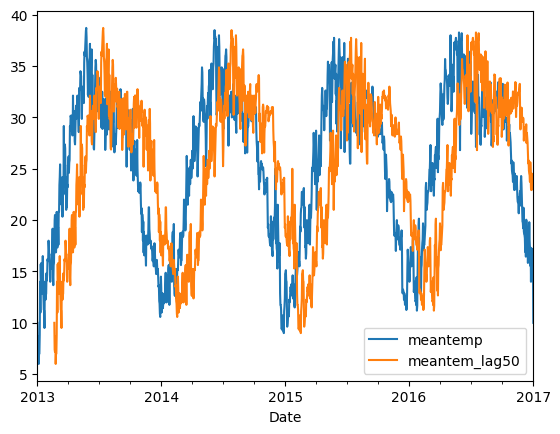

In [ ]:
df[['meantemp' , 'meantem_lag50']].plot()

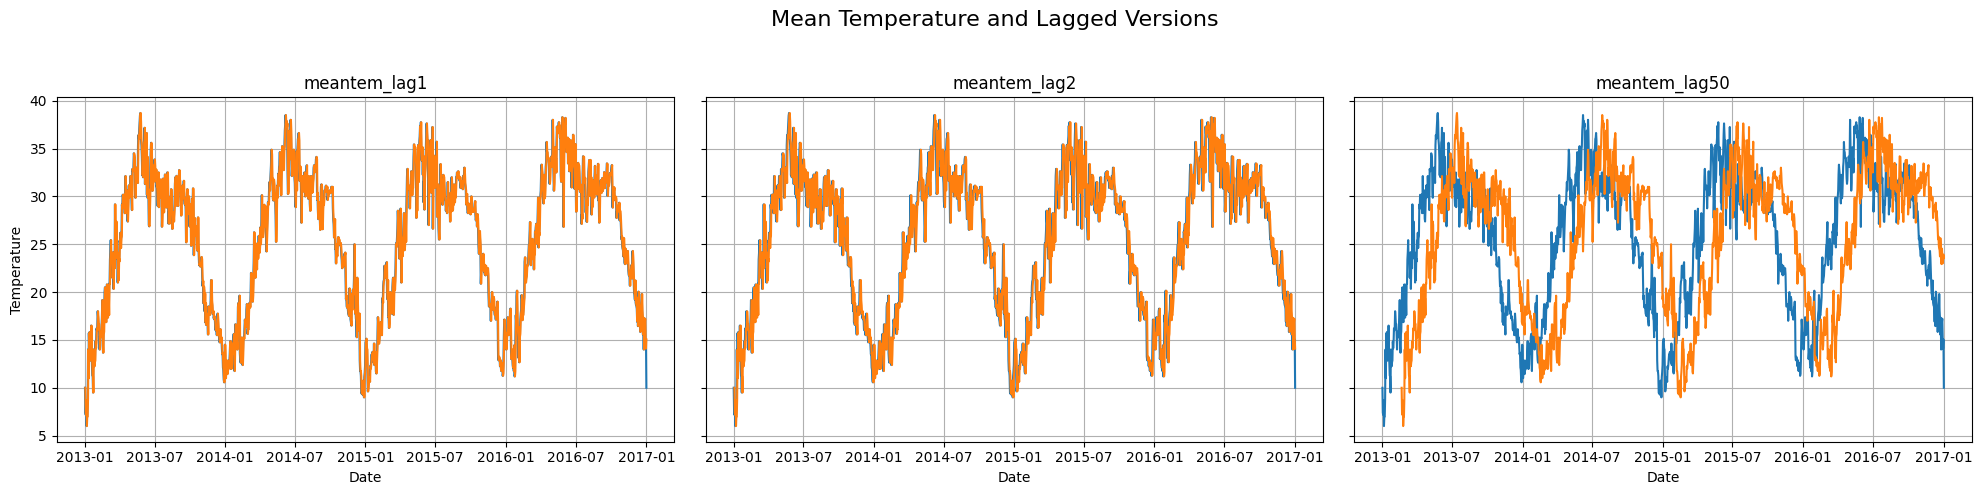

In [ ]:
import matplotlib.pyplot as plt

# Create subplots - 1 row, 4 columns
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)

# Plot each series in its own subplot
axes[0].plot(df[['meantemp' , 'meantem_lag1']])
axes[0].set_title('meantem_lag1')

axes[1].plot(df[['meantemp' , 'meantem_lag2']])
axes[1].set_title('meantem_lag2')

axes[2].plot(df[['meantemp' , 'meantem_lag50']])
axes[2].set_title('meantem_lag50')

# Add a shared y-label and x-label
fig.suptitle('Mean Temperature and Lagged Versions', fontsize=16)
for ax in axes:
    ax.set_xlabel('Date')
    ax.grid(True)
axes[0].set_ylabel('Temperature')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
df[['meantemp' , 'meantem_lag1']].corr()

,meantemp,meantem_lag1
meantemp,1.000000,0.974067
meantem_lag1,0.974067,1.000000


In [ ]:
df.resample('M')['meantemp'].mean()

<ipython-input-140-2a67131b752d>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M')['meantemp'].mean()


,meantemp
Date,
2013-01-31,12.074770
2013-02-28,16.867560
2013-03-31,22.814209
2013-04-30,28.895119
2013-05-31,33.776767
2013-06-30,32.480873
2013-07-31,30.663594
2013-08-31,29.547773
2013-09-30,29.840595


# Seasonality

<ipython-input-141-a7b3c56a2c52>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_plot(df['meantemp'].resample('M').mean(numeric_only=True),


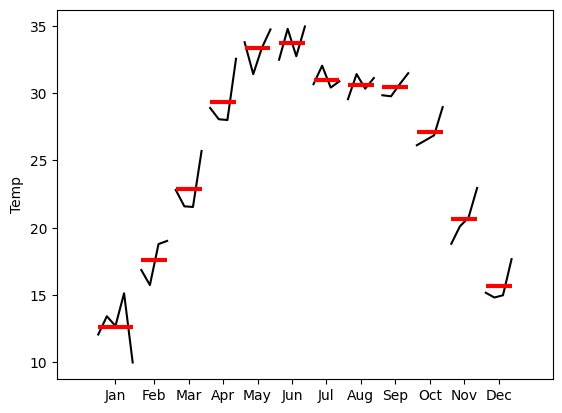

In [ ]:
# month_plot() - To visualize the average value for each month across multiple years in a time series
# red lines - Represents the mean value for each month

# Plotting the monthly seasonality of closing values
month_plot(df['meantemp'].resample('M').mean(numeric_only=True),
           ylabel = 'Temp')
plt.show()

<ipython-input-142-cb6bf5cb4e46>:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(df['meantemp'].resample('Q').mean(),


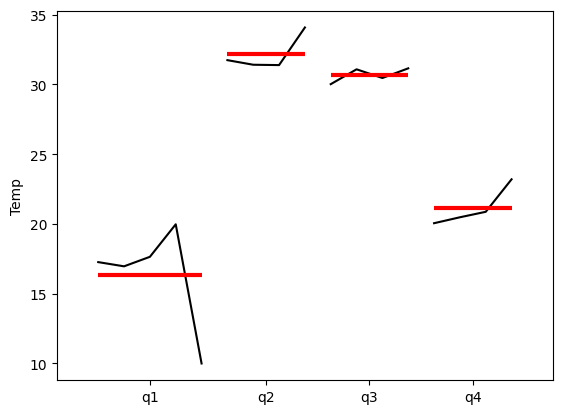

In [ ]:
# quarter_plot() - To visualize seasonal patterns at a quarterly level.
# Q1 (january, february, march), Q2 (april, may, june), Q3 (july, august, september), Q4 (october, november, december)

# Plotting the quarterly seasonality of closing values
quarter_plot(df['meantemp'].resample('Q').mean(),
           ylabel = 'Temp')
plt.show()

<ipython-input-143-cb6bf5cb4e46>:5: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(df['meantemp'].resample('Q').mean(),


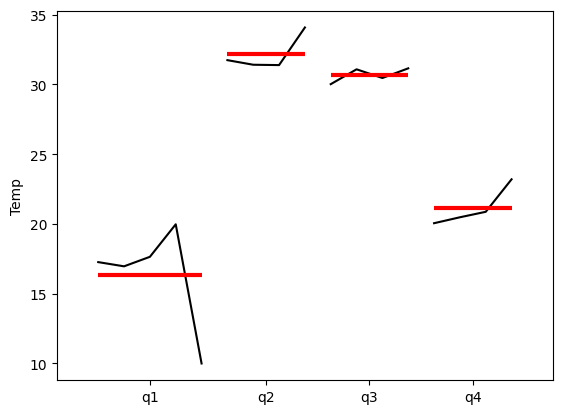

In [ ]:
# quarter_plot() - To visualize seasonal patterns at a quarterly level.
# Q1 (january, february, march), Q2 (april, may, june), Q3 (july, august, september), Q4 (october, november, december)

# Plotting the quarterly seasonality of closing values
quarter_plot(df['meantemp'].resample('Q').mean(),
           ylabel = 'Temp')
plt.show()

In [ ]:
walmart_df = pd.read_csv("/content/walmart-sales-forecast/train.csv")
walmart_df['date'] = pd.to_datetime(walmart_df['Date'], format = '%Y-%m-%d')
walmart_df.set_index('date', inplace = True)
walmart_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
date,,,,,
2010-02-05,1,1,2010-02-05,24924.50,False
2010-02-12,1,1,2010-02-12,46039.49,True
2010-02-19,1,1,2010-02-19,41595.55,False
2010-02-26,1,1,2010-02-26,19403.54,False
2010-03-05,1,1,2010-03-05,21827.90,False


In [ ]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 16.5+ MB


<ipython-input-164-37b06754f934>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = walmart_df['Weekly_Sales'].resample('M').mean()


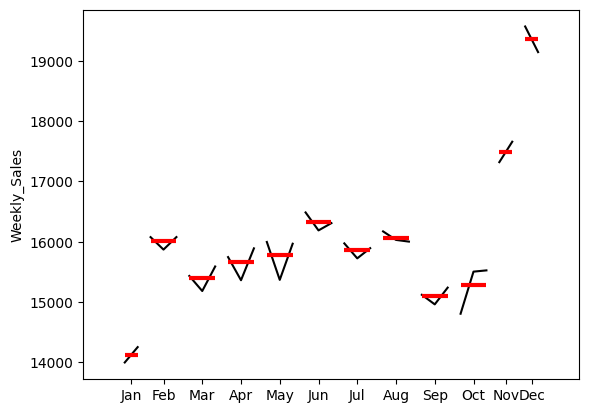

In [ ]:
# Plotting the monthly seasonality of revenue
monthly_sales = walmart_df['Weekly_Sales'].resample('M').mean()

month_plot(monthly_sales,
           ylabel = 'Weekly_Sales')
plt.show()

`seasonal_decompose` - To decompose a time series into its constituent parts to better understand the underlying patterns.

components

- Trend: The overall direction of the series (increasing, decreasing, or stable).
- Seasonal: Repeating patterns at fixed intervals (e.g., daily, weekly, monthly).
- Residual: The remaining variation after removing trend and seasonal components.

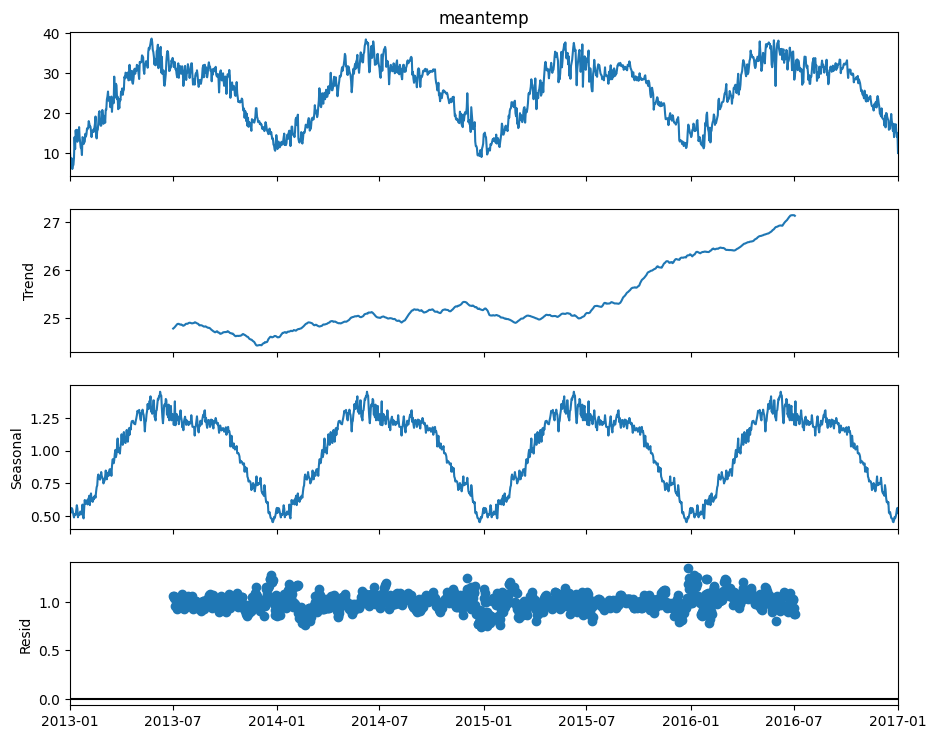

In [ ]:
# Seasonal Decomposition Plots for Bitcoin Data
# Multiplicative model type, and daily (365) period
decomposition = seasonal_decompose(df['meantemp'],
                                   model = 'mul',
                                   period = 365)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

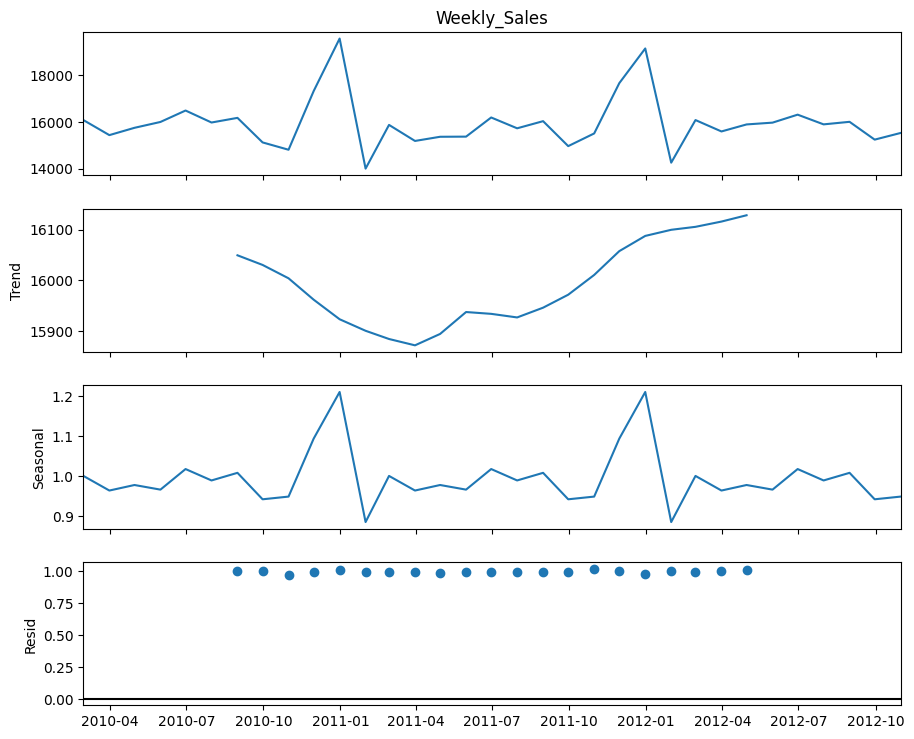

In [ ]:
# Seasonal Decomposition Plots for Chocolate Revenue Data
# Multiplicative model type, and monthly (12) period
decomposition = seasonal_decompose(monthly_sales,
                                   model = 'mul',
                                   period = 12)
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

Seasonality:
* 24 for hourly
* 7 or 365 for daily, but 7 is preferred for modeling
* 52 for weekly
* 12 for monthly
* 4 for quarterly
* 5 for weekdays

# Auto-Correlation

Autocorrelation measures the correlation between a time series and a lagged version of itself.

Purpose: To identify patterns or repeating cycles in a time series dataset.

Interpretation:
- Values range from -1 to 1.
- 1 indicates perfect positive correlation.
- -1 indicates perfect negative correlation.
- 0 indicates no correlation.

ACF Plot:
- X-axis: Lag periods
- Y-axis: Correlation coefficient

Key Features:
- At lag 0, autocorrelation is always 1 (a series is perfectly correlated with itself).
- Significant spikes at certain lags indicate repeating patterns.




In [ ]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure,7_day_rolling,30_day_rolling_temp,year,month,day,weekday,weekday_numeric,is_weekend,meantem_lag1,meantem_lag2,meantem_lag50
Date,,,,,,,,,,,,,,,,
2013-01-01,2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN,NaN,2013,1,1,Tuesday,1,False,NaN,NaN,NaN
2013-01-02,2013-01-02,7.400000,92.000000,2.980000,1017.800000,NaN,NaN,2013,1,2,Wednesday,2,False,10.000000,NaN,NaN
2013-01-03,2013-01-03,7.166667,87.000000,4.633333,1018.666667,NaN,NaN,2013,1,3,Thursday,3,False,7.400000,10.000000,NaN
2013-01-04,2013-01-04,8.666667,71.333333,1.233333,1017.166667,NaN,NaN,2013,1,4,Friday,4,False,7.166667,7.400000,NaN
2013-01-05,2013-01-05,6.000000,86.833333,3.700000,1016.500000,NaN,NaN,2013,1,5,Saturday,5,True,8.666667,7.166667,NaN


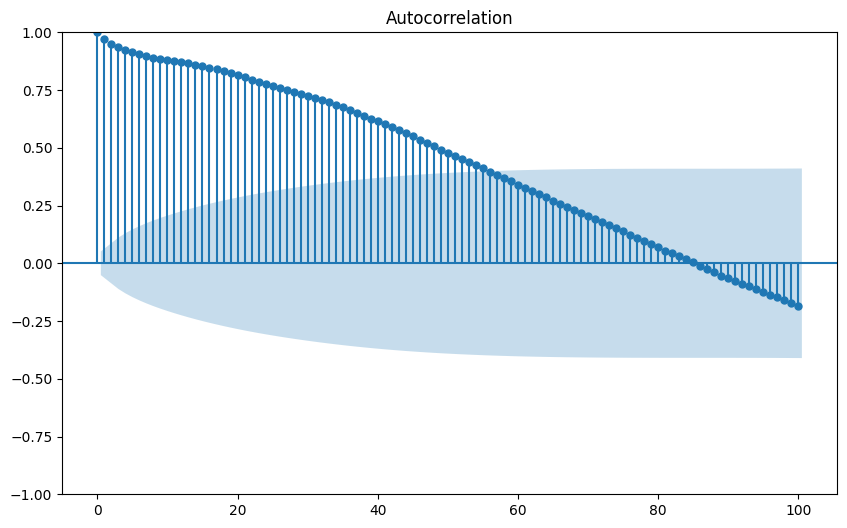

In [ ]:
# Plot the autocorrelation (ACF) of the bitcoin closing values
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(df['meantemp'], lags = 100, ax = ax)
plt.show()

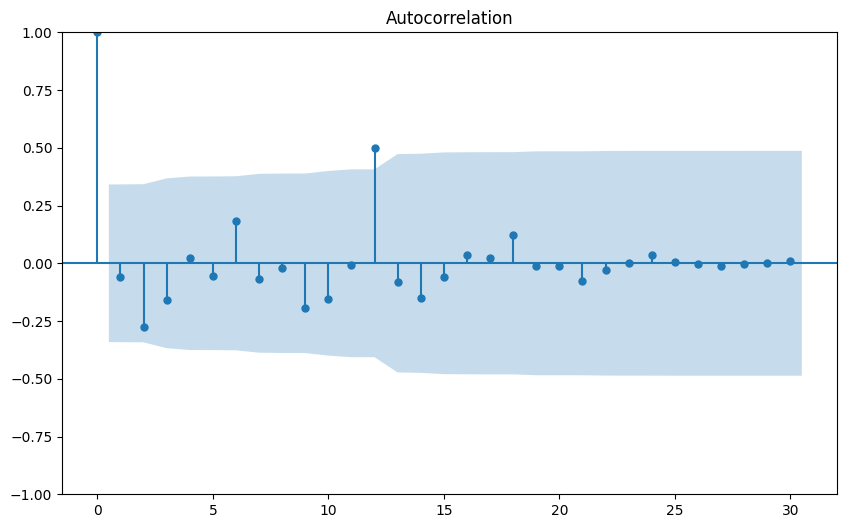

In [ ]:
# Plot the autocorrelation (ACF) of the chocolate revenue values
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(monthly_sales, lags = 30, ax = ax)
plt.show()

# Partial Auto-correlation

PACF measures the correlation between a time series and its lag, after removing the effects of all shorter lags.

Purpose: To identify the direct relationship between an observation and its lag, without intermediate effects.

Main Difference between ACF and PACF:
- ACF: Measures overall correlation at each lag, including indirect effects.
- PACF: Measures direct correlation at each lag, excluding indirect effects.

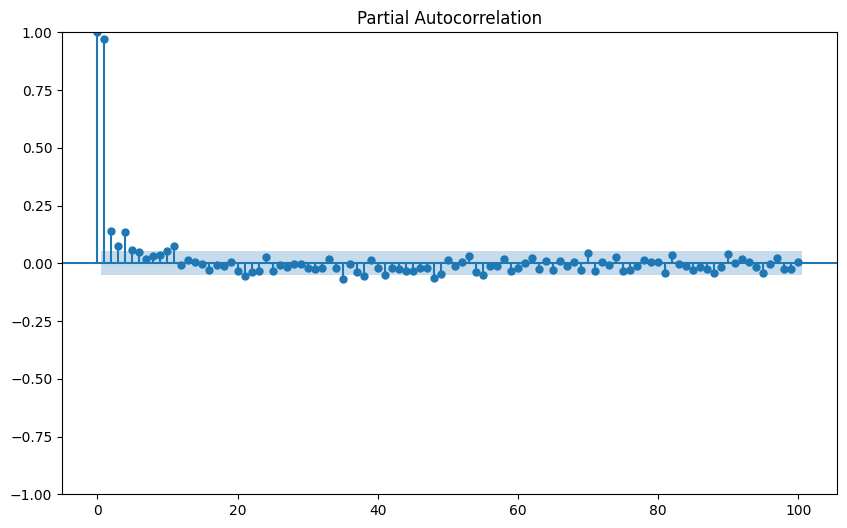

In [ ]:
# Plot the partial autocorrelation (PACF) of the bitcoin closing values
fig, ax = plt.subplots(figsize = (10,6))
plot_pacf(df['meantemp'], lags = 100, ax = ax)
plt.show()

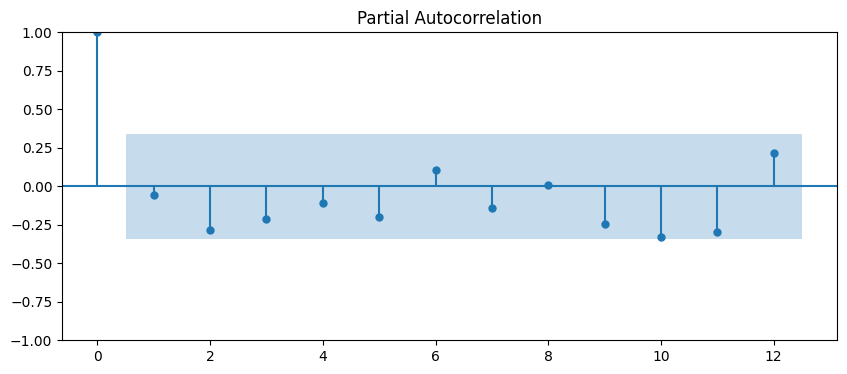

In [ ]:
# Plot the partial autocorrelation (PACF) of the chocolate revenue values
fig, ax = plt.subplots(figsize = (10,4))
plot_pacf(monthly_sales, lags = 12, ax = ax)
plt.show()